# Basic Truss Example

This notebook seeks to breakdown the 'basic truss example' that is available on the OpenSees Wiki page [here](https://opensees.berkeley.edu/wiki/index.php?title=Basic_Truss_Example). The code on OpenSees Wiki is in Tcl language. There is also a script available for this example in the OpenSeesPy documentation, written in Python language [here](https://openseespydoc.readthedocs.io/en/latest/src/truss.html). This notebook will also act as a brief directory on how to navigate the OpenSeesPy documentation. The example used in the notebook is a 2-dimensional truss with 4 nodes and 3 elements. 

## Diagram

![Basic truss example picture.PNG](<attachment:Basic truss example picture.PNG>)
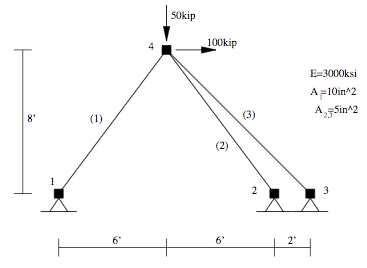

## Unit and Variable definition

First, we will define some unit conversions, so that we can use SI units in the example.

In [118]:
#Units
m = 1
mm = 0.001*m
N = 1
kN = 1000 * N
Pa = 1

inches = 25.4*mm
ft = 12*inches
kip = 4.45*10**3*N
ksi = 6.89*10**6*Pa

Next, we define input variables. The required input variables for this example include node coordinates on the x-y plane, cross-sectional areas of elements, the modulus of elasticity of the material, and the loads applied to the truss.

In [119]:
#Input variables

#Node Coordinates
x1 = 0.
y1 = 0.

x2 =12.*ft
y2 = 0.

x3 = 14.*ft
y3 = 0.

x4 = 6.*ft
y4= 8.*ft

#Cross sectional Area of elements
A1 = 10.*inches**2
A2 = 5.*inches**2

#Modulus of elastisity of the material
E = 3000*ksi

#Loads
Px = 50*kN
Py = 50*kN

We can now start the analysis of the truss using OpenSeesPy. To start, we import the module and name it ops for convenience. The numpy module is also imported as this will be used within the script. The first OpenSeesPy command we will use is the wipe command. The wipe command clears the terminal and it is good practice to use it as the first command in any OpenSeesPy script to remove any previous model definitions. There is also an if statement used to create a new file path for the analysis outputs. It is advisable to stop your main folder from getting overpopulated with output files. You can copy this code to use in your scripts, ensure you import the 'os' module as shown above.

In [120]:
#Opensees Analysis

#Import openseespy 
import openseespy.opensees as ops
import numpy as np
import opsvis as opsv
import matplotlib.pyplot as plt
import os

#Wipe model
ops.wipe()

#Create file path for data output
if not os.path.exists('Data'):
    os.mkdir('Data')

## Model Definition

Next, we begin creating the model using the OpenSeesPy 'model' command. To keep sign conventions consistent, it is advisable to use 3 DoF for problems with 2 dimensions, and 6 DoF for problems with 3 dimensions. 

In [121]:
#Create ModelBuilder (2 dimensions, 3 DOFs/nodes)
ops.model('basic', '-ndm', 2, '-ndf', 3)

The inputs to commands can be found easily in the OpenSeesPy documentation. An example of the information found on the website for the model command performed above is shown below. The documentation also shows you what the expected input type is i.e. integer, float, list, string.

![OpenSeesPy documentation picture.PNG](<attachment:OpenSeesPy documentation picture.PNG>)
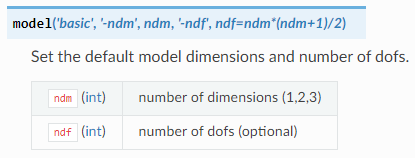

Next, we define the materials in the model. In this case, we use the 'uniaxialMaterial' command. There is also the 'nDMaterial' command which can be used to define more complex materials. The material type we will use in this example is elastic. We have given the material a 'material tag' of 1, it is good practice to keep the material tags the same in larger models when you have multiple materials. Also passed into the command as a material argument is Young's modulus.

In [122]:
# define materials
ops.uniaxialMaterial("Elastic", 1, E)

For commands that have multiple 'type' inputs, the OpenSeesPy documentation shows an example of the command in use and also details the available 'types'. An example of the available information is shown below.

![uniaxial material types.PNG](<attachment:uniaxial material types.PNG>)
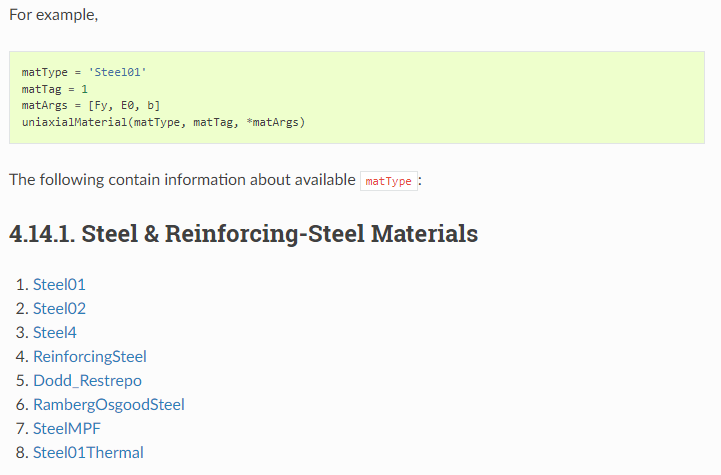

By clicking on the material type that you want to use in the OpenSeesPy documentation, you can see the expected inputs of the command for the particular material type you are using. The example shown below is for the 'Steel01' material type.

![Steel01 material type.PNG](<attachment:Steel01 material type.PNG>)
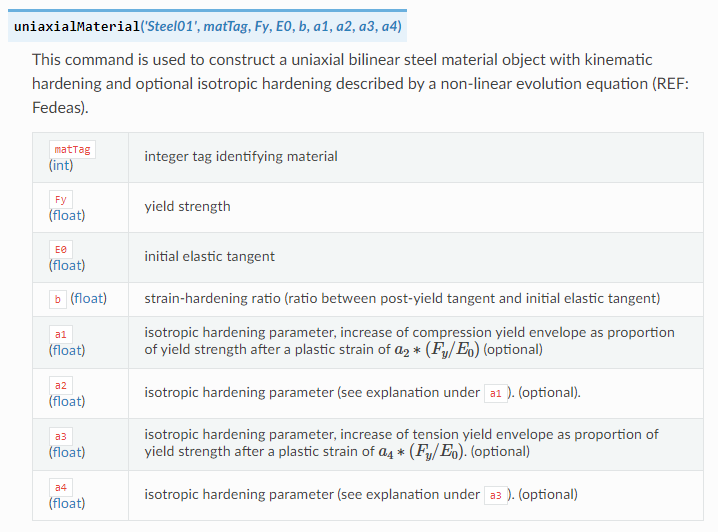

We can now define the nodes of the model, using the 'node' command and the coordinates that were previously defined. The node command creates and node and then assigns coordinates to the node. Nodes should be numbered in a logical sequence using the node tag.

In [123]:
# # create nodes
# ops.node(1, x1, y1)
# ops.node(2, x2, y2)
# ops.node(3, x3, y3)
# ops.node(4, x4, y4)

Nodes can also defined in a for-loop as seen below. This is not particularly important in simple examples such as this, but is useful for larger more complex models.

In [124]:
# create nodes
nodes = np.array([[x1,y1],[x2,y2],[x3,y3],[x4,y4]])
for i, n in enumerate(nodes):
    ops.node(i+1, float(n[0]), float(n[1]))
    print(f'Node {i+1} is defined')

Node 1 is defined
Node 2 is defined
Node 3 is defined
Node 4 is defined


Then we set the boundary conditions of each node using the 'fix command'. The first input is the node tag of the node that you are applying the boundary conditions to. Following this input a list of the constraints upon each degree of freedom using 0 to represent 'free' and 1 to represent 'fixed'. The command will expect a list with as many inputs as there are degrees of freedom. The order of degrees of freedom should be, x-direction, y-direction, then rotation. In the case of this example, the 3 lower notes are fixed for each degree of freedom because they are connected to a 'pin connection'.  However, the upper node is free to move meaning the x and y directions are set as free for this node. When using 'truss' elements (defined in the next section), the free rotational degree of freedom we would expect for the pin connections in this example is taken care of. So we set the rotational degree of freedom as fixed. 

Text(0.5, 1.0, 'Nodes')

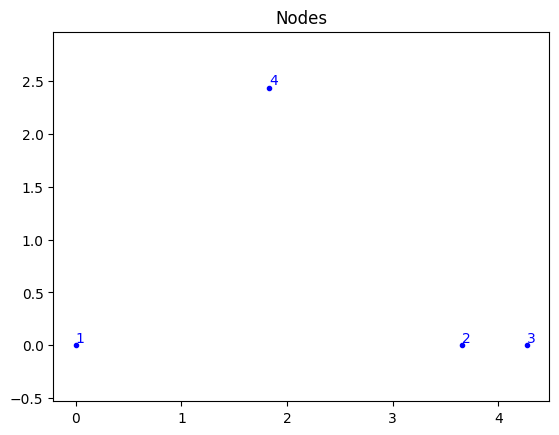

In [125]:
# set boundary condition
ops.fix(1, 1, 1, 1)
ops.fix(2, 1, 1, 1)
ops.fix(3, 1, 1, 1)
ops.fix(4, 0, 0, 1)

#Plotting the model
opsv.plot_model()
plt.title('Nodes')

Next elements can be defined, in this case, the 'truss' element type was selected. The element function defines the type of element, the nodes that it connects, the cross-sectional area, and the material of the element.

Text(0.5, 1.0, 'Nodes and Elements')

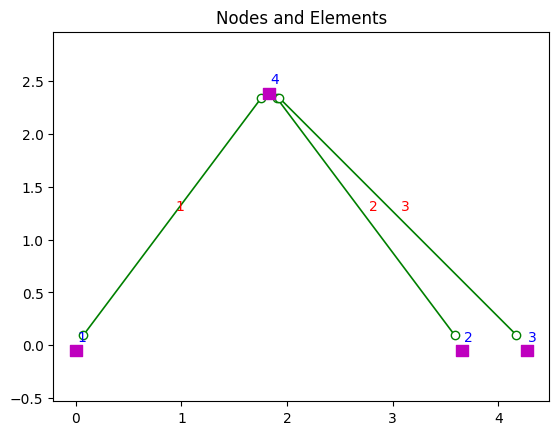

In [126]:
# define elements
ops.element("Truss", 1, 1, 4, A1, 1)
ops.element("Truss", 2, 2, 4, A2, 1)
ops.element("Truss", 3, 3, 4, A2, 1)

#Plotting the model
opsv.plot_model()
plt.title('Nodes and Elements')

The next step is to define the loading conditions that the model should be analyzed under. This begins with creating a time series using the 'timeSeries' command. A time series represents the relationship between time and the load factor that is applied to the loads (i.e. the change in load magnitude across time). Next, a load pattern object is defined using the 'pattern command', in this case, a 'plain' pattern type is used. Each Load pattern can contain multiple loads applied to multiple nodes or elements. In addition to this, the load pattern can contain multiple single-point constraints that can be applied to individual nodes. The load pattern is associated with the time series. Lastly, the nodal load can be defined using the 'load' command. The load command inputs are node tag and load values ordered x-direction then y-direction. The node tag input dictates the node the load is applied to and the load values are reference load values. The magnitude of the load applied is determined by the product of the load factor and the reference values.

Text(0.5, 1.0, 'Loads')

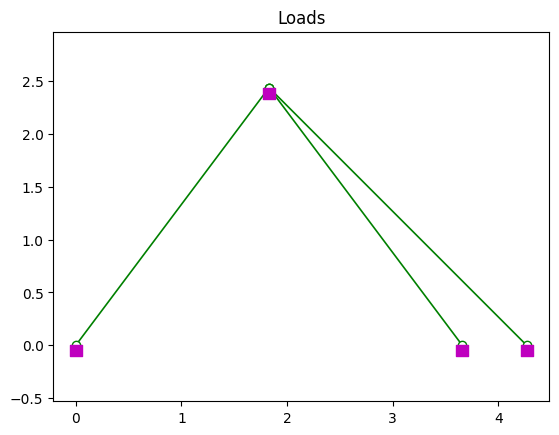

In [127]:
# create TimeSeries
ops.timeSeries("Linear", 1)

# create a plain load pattern
ops.pattern("Plain", 1, 1)

# Create the nodal load - command: load nodeID xForce yForce
Px = Px * kN
Py = Py * kN
ops.load(4, Px, Py, 0)

#Plot loads 
opsv.plot_loads_2d(nep=17, sfac=False, fig_wi_he=False, fig_lbrt=False, fmt_model_loads={'color': 'black', 'linestyle': 'solid', 'linewidth': 1.2, 'marker': '', 'markersize': 1}, node_supports=True, truss_node_offset=0, ax=False)
plt.title('Loads')

## Output Specification

Now recorders can be created using the 'recorder' command. The recorder command outputs a file with the results of the analysis. The documentation details all of the options that apply to the node and element recorder commands.  The recorders below use the following sequence of inputs. Select the recorder type, set the file format as a text file, name the file, record against the time domain, state the type of object you want to record, and the tag or tags of the objects you want to record. The element recorder ends with a list of the arguments that should be recorded, in this case containing one argument 'force'. The options of arguments are not shown in the recorder documentation for the element recorder. Rather, they are shown for each element type within their respective documentation. For example, the relevant section for the 'truss' element type used in this example is shown in the below recorder code. The node recorder ends with passing the degrees of freedom of the nodes, then a string indicating the response type. The response type options are specified in the documentation. 

In [128]:
#Displacement, Reaction recorder, and element recorder
ops.recorder('Node', '-file', "Data/NodeDisp.out", '-time', '-node', 4, '-dof', 1,2,3, 'disp')
ops.recorder('Node', '-file', "Data/Reaction.out", '-time', '-node', 1,2,3, '-dof', 1,2,3, 'reaction')
ops.recorder('Element', '-file', "Data/Elements.out", '-time', '-ele', 1,2,3, 'forces')

20

![Recorder input documentation.PNG](<attachment:Recorder input documentation.PNG>)
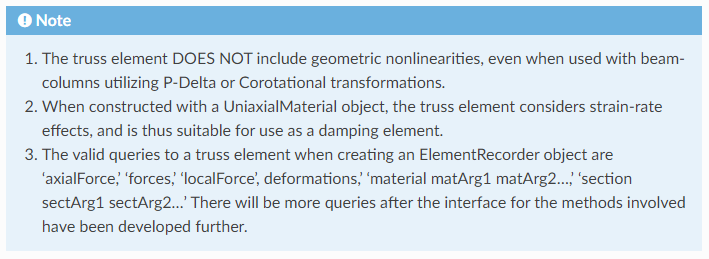

## Analysis



The analysis process executed by opensees is very complicated. An in depth understanding of the analysis command and the processes behind them is not nececarry for an entry level user of opensees. The analysis scripts used for most basic examples generally very similar, and the users choice of command type often will not change the awnser significantly. The analysis script used in this example has been split into indavidual commands and a breif decription of each step is provided.

The system command creates the system of equations solver. "BandSPD" is a type of solver optimized for 'banded symmetric positive definite' matrices, commonly used in structural analyses.

In [129]:
# create SOE
ops.system("BandSPD")

The numberer command numbers to the degrees of freedom (DOFs) in the model using the "Reverse Cuthill-McKee" (RCM) algorithm. This algorithm optimises the system of equations and improves computational efficiency.

In [130]:
# create DOF number
ops.numberer("RCM")

This defines how the model handles constraints (fixed or supported points). The "Plain" option is the simplest method and works for most standard boundary conditions.

In [131]:
# create constraint handler
ops.constraints("Plain")

The integrator controls how the loads are applied during the analysis. "LoadControl" applies the loads step by step, and here 1.0 means applying the full load in one step.

In [132]:
# create integrator
ops.integrator("LoadControl", 1.0)

The algorithm command chooses the method to solve the equations. "Newton" refers to the Newton-Raphson algorithm which is a basic method used to find the solution by making guesses and iterating them until the program converges to the right answer.

In [133]:
# create algorithm
ops.algorithm("Newton")

The analysis command specifies the type of analysis to be performed, in this case, a static analysis. This is essential for defining how the model will be analyzed under the given loads and constraints.

In [134]:
# create analysis object
ops.analysis("Static")

The initialise command prepares the model for the analysis process. It sets up the internal data and makes sure the program is ready to run the calculations.

In [135]:
#Initialise values
ops.initialize()

This runs the analysis for a specified number of steps, in this case, just 1 step. If the analysis is successful, the function returns 0, indicating that the solution has converged successfully.

In [136]:
# perform the analysis
ok = ops.analyze(1)

Once the analysis has been run, the opsvis module can be used to help visualise the results of the analysis.

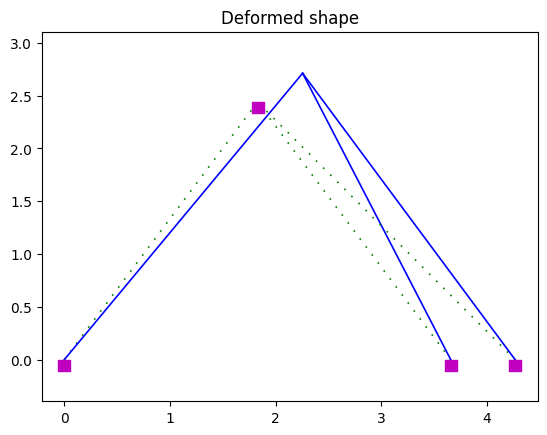

In [137]:
#Other plotting commands
opsv.plot_defo(interpFlag=0)
plt.title('Deformed shape')
plt.show()

ops.wipe()